In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
data = pd.read_excel('bank-additional-full.xlsx')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

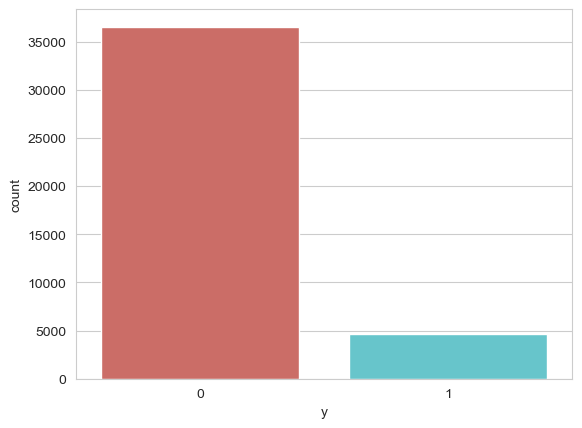

In [4]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [5]:
data.groupby('y').mean()

C:\Users\taqua\AppData\Local\Temp\ipykernel_29968\3162251243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


# Mối quan hệ giữa các class

In [23]:
def draw_chart(a, b):
    pd.crosstab(data[a], data[b]).plot(kind='bar')
    plt.title('Tên đồ thị')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.rc("font", size=15)

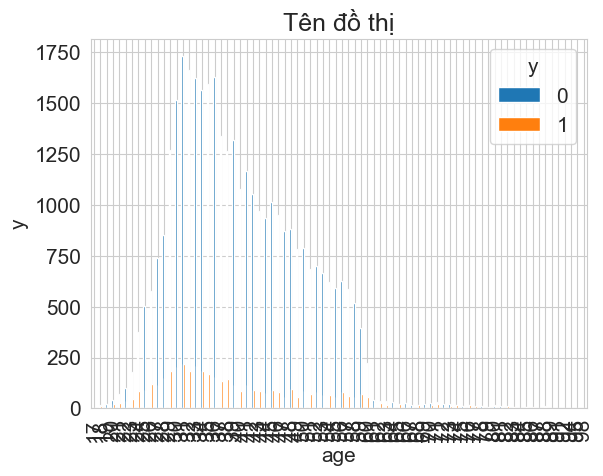

In [24]:
draw_chart('age', 'y')

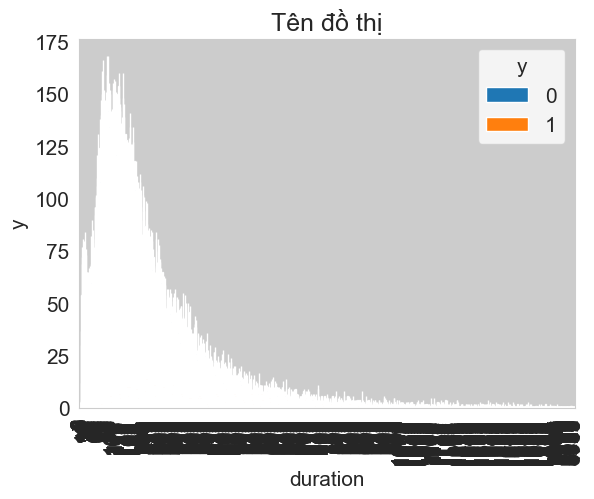

In [25]:
draw_chart('duration', 'y')

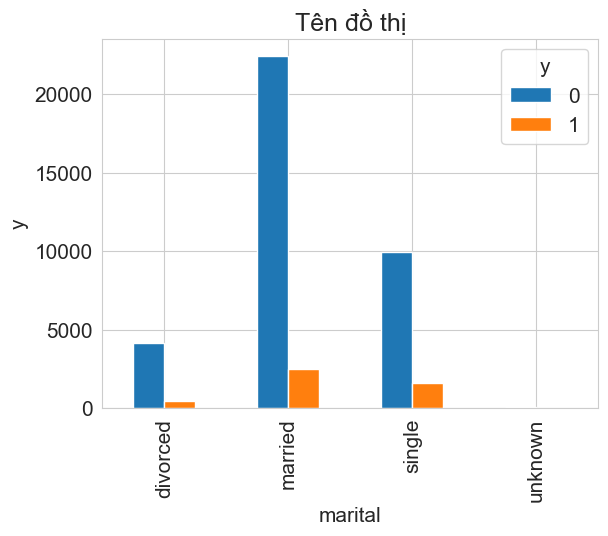

In [31]:
draw_chart('marital', 'y')

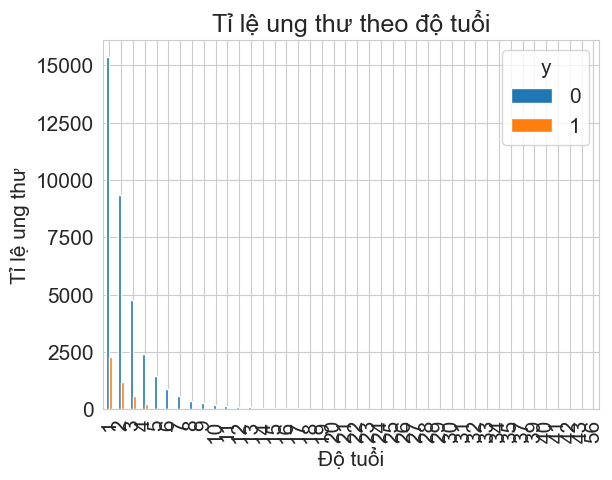

In [13]:
draw_chart('campaign', 'y')

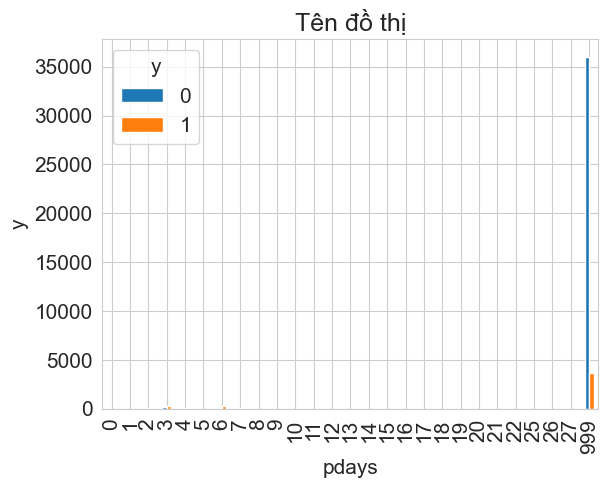

In [26]:
draw_chart('pdays', 'y')

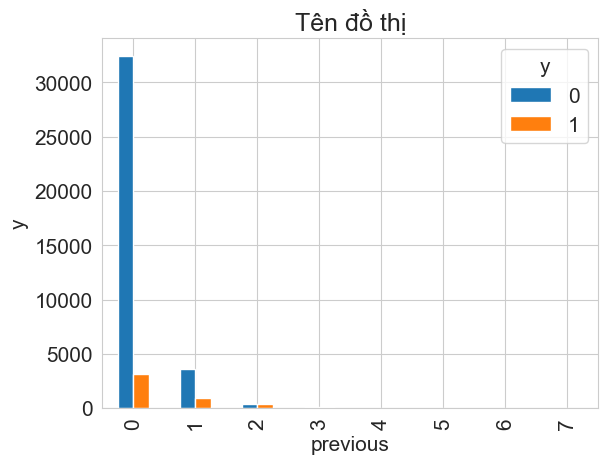

In [27]:
draw_chart('previous', 'y')

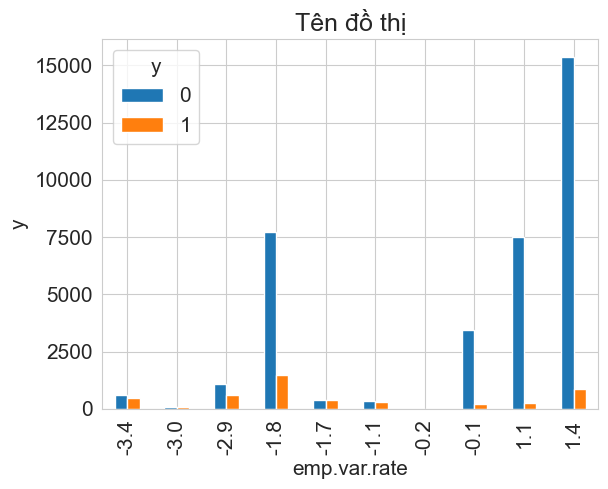

In [28]:
draw_chart('emp.var.rate', 'y')

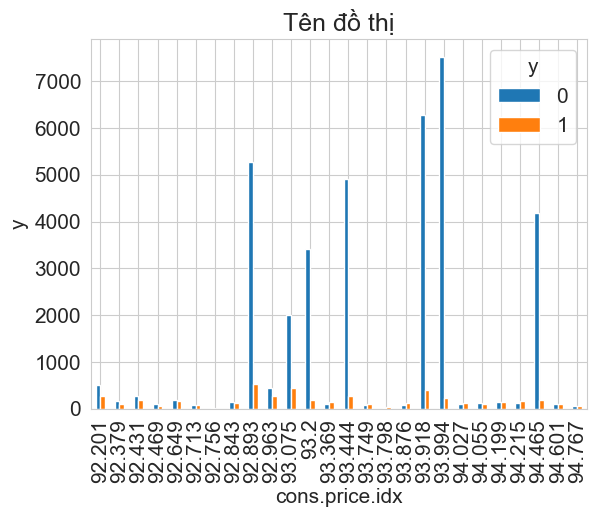

In [29]:
draw_chart('cons.price.idx', 'y')

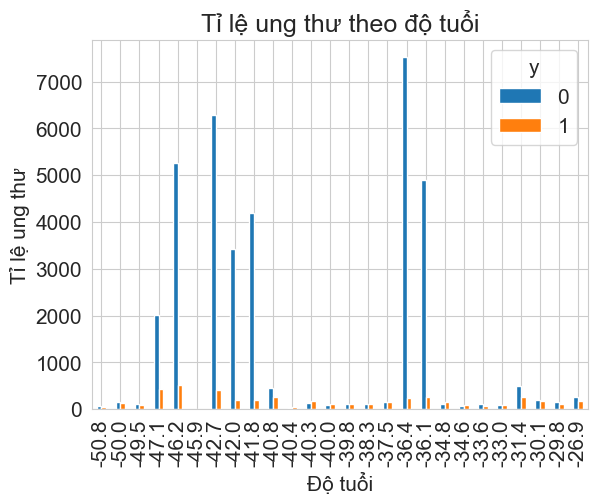

In [18]:
draw_chart('cons.conf.idx', 'y')

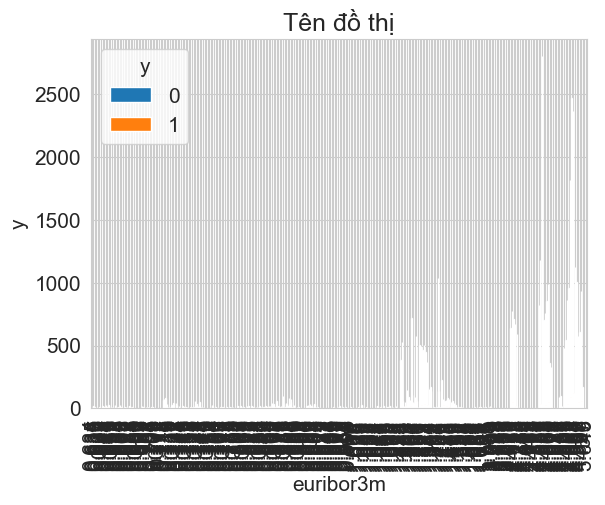

In [30]:
draw_chart('euribor3m', 'y')

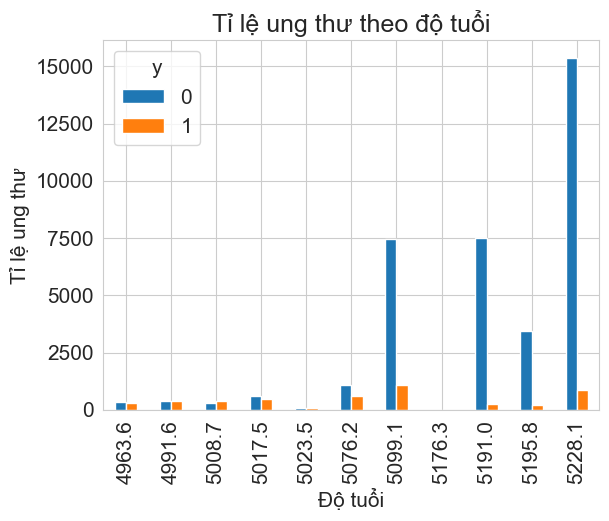

In [20]:
draw_chart('nr.employed', 'y')

In [32]:
cat_features= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in cat_features:
    print(feature)
    job_list = pd.get_dummies (data[feature], prefix=feature)
    new_data = data.join(job_list)
    data = new_data

data.head()

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


In [33]:
data_features= data.columns.values.tolist()
print(data_features)
remove_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
to_keep_features= [i for i in data_features if i not in remove_features]
print(to_keep_features)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month

In [34]:
data_final = data[to_keep_features]
data_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
features_X = np.array(data_final.loc[:, data_final.columns != 'y'])
#Feature_X.head()
print(features_X)

[[ 56. 261.   1. ...   0.   1.   0.]
 [ 57. 149.   1. ...   0.   1.   0.]
 [ 37. 226.   1. ...   0.   1.   0.]
 ...
 [ 56. 189.   2. ...   0.   1.   0.]
 [ 44. 442.   1. ...   0.   1.   0.]
 [ 74. 239.   3. ...   1.   0.   0.]]


In [36]:
targets_Y = np.array(data_final.loc[:, data_final.columns == 'y'])
#targets_Y.head()
print(targets_Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [37]:
train_features, test_features, train_targets, test_targets = train_test_split(features_X, targets_Y, test_size=0.3, random_state=0)
print("##### Training and test datasets ###")
print("Training size: ", len(train_targets))
print("Test size: ", len(test_targets))
print(test_targets)

##### Training and test datasets ###
Training size:  28831
Test size:  12357
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [38]:
classifier_logreg = LogisticRegression()
classifier_logreg.fit(train_features, train_targets)
predictions = classifier_logreg.predict(test_features)
print("Prediction results of Logistic Regression #####")
print("Target labels: ", test_targets.T)
print("Prediction labels: ", predictions)

C:\Users\taqua\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction results of Logistic Regression #####
Target labels:  [[1 0 0 ... 0 0 1]]
Prediction labels:  [0 0 0 ... 0 0 0]


C:\Users\taqua\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
accuracy = 100* accuracy_score(test_targets, predictions)
print("######## Prediction accuracy of Logistic Regression ######")
print("Accuracy of Logistic Regression: ", accuracy)
print(classification_report(test_targets, predictions))

######## Prediction accuracy of Logistic Regression ######
Accuracy of Logistic Regression:  91.08197782633324
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.67      0.40      0.50      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [40]:
predictions = classifier_logreg.predict(train_features)
print("###### Prediction results of Logistic Regression #####")
print("Target labels: ", train_targets.T)
print("Prediction labels: ", predictions)

###### Prediction results of Logistic Regression #####
Target labels:  [[0 0 0 ... 1 0 0]]
Prediction labels:  [0 0 0 ... 0 0 0]


In [41]:
accuracy = 100* accuracy_score(train_targets, predictions)
print("######## Prediction accuracy of Logistic Regression ######")
print("Accuracy of Logistic Regression: ", accuracy)
print(classification_report(train_targets, predictions))

######## Prediction accuracy of Logistic Regression ######
Accuracy of Logistic Regression:  90.76341438035448
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25579
           1       0.65      0.38      0.48      3252

    accuracy                           0.91     28831
   macro avg       0.79      0.68      0.72     28831
weighted avg       0.89      0.91      0.90     28831

